It is an AI agent that thinks, then decides whether to call a tool (math function(add, mul , divide), search, etc.) or not , then returns the final answer.

In [7]:
print("helo Shubham")

helo Shubham


In [8]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name="qwen/qwen3-32b",
    temperature=0)
response = llm.invoke("what is the top 10 crypto")

e:\Agentic-AI-code\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
response

AIMessage(content='<think>\nOkay, the user is asking for the top 10 cryptocurrencies. Let me start by recalling the major ones. Bitcoin is definitely number one. Then Ethereum is second. I think Binance Coin is third, but I should check the current market cap to be sure. Solana has been rising in popularity, maybe fourth? Then there\'s Cardano, maybe fifth. \n\nWait, I need to make sure the order is accurate. Let me think. After Bitcoin and Ethereum, the next big ones are usually Binance Coin (BNB), then maybe Solana (SOL), followed by Cardano (ADA), Dogecoin (DOGE), Polkadot (DOT), XRP, and maybe Avalanche (AVAX) or Chainlink (LINK). But I should verify the current market positions because they can fluctuate.\n\nAlso, the user might be interested in both market cap and use cases. For example, Dogecoin is more of a meme coin but still in the top 10. XRP is involved in cross-border payments. I should mention each one\'s key features briefly. Let me list them in order and add a note that

In [10]:
response.content

'<think>\nOkay, the user is asking for the top 10 cryptocurrencies. Let me start by recalling the major ones. Bitcoin is definitely number one. Then Ethereum is second. I think Binance Coin is third, but I should check the current market cap to be sure. Solana has been rising in popularity, maybe fourth? Then there\'s Cardano, maybe fifth. \n\nWait, I need to make sure the order is accurate. Let me think. After Bitcoin and Ethereum, the next big ones are usually Binance Coin (BNB), then maybe Solana (SOL), followed by Cardano (ADA), Dogecoin (DOGE), Polkadot (DOT), XRP, and maybe Avalanche (AVAX) or Chainlink (LINK). But I should verify the current market positions because they can fluctuate.\n\nAlso, the user might be interested in both market cap and use cases. For example, Dogecoin is more of a meme coin but still in the top 10. XRP is involved in cross-border payments. I should mention each one\'s key features briefly. Let me list them in order and add a note that the rankings can 

creating custom tools

In [11]:
from langchain.tools import tool

@tool
def multiply(a:int, b:int)->int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a:int, b:int)->int:
    """
    Adding two integers

    Args:
         a (int): The first integer.
         b (int): The second integer.

    Returns:
         int: The product of a and b.
    """
    return a+b

@tool
def divide(a:float , b:float)->float:
    """
    Divide two integers.

    Args: 
        a(int): The first integer
        b(int): The second integer(must be non zero)

    Returns:    
        float: The result of the divison

    """
    if b==0:
        raise ValueError("Denominator can not be zero")
    return a/b



Importing the inbuilt tools

In [12]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()


In [13]:
search.invoke("what is the latest update on stock market")


"Are you looking for the latest updates on the stock market ? CNN's updated stock data coverage provides the latest news and analysis on US markets ... Investors can get the latest updates on US markets , global markets , stock prices, cryptocurrencies, commodities and currencies. The best way to stay up-to-date on stock market news is through a platform that offers real-time alerts through text messages, email, or push ... US large-cap stocks were mixed as the technology sector dragged on a fresh sell-off in Tesla (TSLA), but the broader market had plenty of momentum ... In Europe, stocks are showing positive movement, with the STOXX Europe 600 Index climbing by 0.06% and the FTSE 100 Index rising by 0.13% from the ..."

In [14]:
tools=[multiply, add, divide, search]

In [15]:
llm_with_tools=llm.bind_tools(tools)


In [16]:
response=llm_with_tools.invoke("hello, Shubham this side")


In [17]:
response

AIMessage(content="Hello! It seems like you might be trying to reach someone named Shubham, but I'm an AI here to help. How can I assist you today? Feel free to ask me any questions or let me know if you need guidance on something! 😊", additional_kwargs={'reasoning_content': 'Okay, the user said "hello, Shubham this side". Let me think about how to respond.\n\nFirst, I need to acknowledge their greeting. Since they mentioned "Shubham this side," maybe they\'re trying to get in touch with someone named Shubham. But I\'m an AI, so I should clarify that. \n\nI should greet them back and let them know I\'m here to help. Maybe ask how I can assist them. Keep it friendly and open-ended. \n\nNo need to use any tools here because it\'s just a hello message. The user might have a question or need help with something, but I should prompt them to specify what they need. \n\nMake sure the response is polite and encourages them to ask questions or share what\'s on their mind. Avoid any technical ja

In [18]:
response.content

"Hello! It seems like you might be trying to reach someone named Shubham, but I'm an AI here to help. How can I assist you today? Feel free to ask me any questions or let me know if you need guidance on something! 😊"

In [19]:
response.tool_calls


[]

In [20]:
response=llm_with_tools.invoke("what is 1+2?")


In [21]:
response.content

''

In [22]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 1, 'b': 2},
  'id': 'tahs4c2gr',
  'type': 'tool_call'}]

In [23]:
response=llm_with_tools.invoke("what is a current price of nifty?")


In [24]:
response

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the current price of Nifty. Nifty usually refers to the Nifty 50 index, which is a stock market index in India. To get the current price, I need to check the latest data from a reliable source. Since the user is asking for real-time information, I should use the DuckDuckGo Search function to look up the current value. The other functions like add, multiply, or divide aren\'t relevant here. So, I\'ll call the duckduckgo_search function with the query "current price of Nifty 50" to fetch the latest data.\n', 'tool_calls': [{'id': 'n0rtxhhwr', 'function': {'arguments': '{"query":"current price of Nifty 50"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 159, 'prompt_tokens': 502, 'total_tokens': 661, 'completion_time': 0.304317888, 'prompt_time': 0.02090454, 'queue_time': 0.052681805, 'total_time': 0.325222428}, 'model_name': 'qwen/qwe

In [25]:
response.content

''

In [26]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'current price of Nifty 50'},
  'id': 'n0rtxhhwr',
  'type': 'tool_call'}]

In [27]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."


In [28]:
user_query=["tell me what is 1+2"]

In [29]:
[SYSTEM_PROMPT]+user_query


['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 1+2']

In [30]:
from langgraph.graph import MessagesState

def fun_1 (state:MessagesState):
    user_question = state["messages"]
    input_question = [SYSTEM_PROMPT]+user_question
    response = llm_with_tools.invoke(input_question)
    return {
        "messages":[response]
    }

 

In [31]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [32]:
builder=StateGraph(MessagesState)


In [33]:
builder.add_node("query_classifier",fun_1)


In [34]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [35]:
builder.add_edge(START,"query_classifier")

In [36]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "query_classifier",
    tools_condition,
)

In [37]:
builder.add_edge("tools","query_classifier")


In [38]:
react_graph=builder.compile()


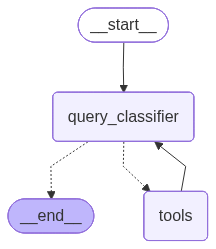

In [39]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [40]:
message = [HumanMessage(content="How much is the net worth of Mukesh Ambani, and divide it by 2?")]


In [41]:
react_graph.invoke({"messages":message})


{'messages': [HumanMessage(content='How much is the net worth of Mukesh Ambani, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='99db9256-3628-45ee-9aed-85dd67defe0f'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for Mukesh Ambani\'s net worth divided by two. First, I need to find his current net worth. Since net worth can fluctuate, especially for someone like Ambani, I should use the DuckDuckGo search function to get the latest information. \n\nI\'ll start by performing a search for "Mukesh Ambani net worth 2024" to ensure the data is up-to-date. Once I get the net worth, I\'ll need to divide it by two. The divide function requires two numbers, so after retrieving the net worth as a number, I\'ll apply the division.\n\nWait, the user might expect the answer in a specific format. Let me make sure to present the result clearly. Also, I need to check if the net worth is in a numerical format that can be divided. If the s

In [42]:
message = [HumanMessage(content="What is the distance between jewar and aligarh and multiply it by 10?")]


In [43]:
response= react_graph.invoke({"messages":message})


In [44]:
response


{'messages': [HumanMessage(content='What is the distance between jewar and aligarh and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='f83a6315-b8c2-4514-a918-3d1a69e0ee1b'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the distance between Jewar and Aligarh and then wants to multiply that distance by 10. Let me break this down step by step.\n\nFirst, I need to find the distance between the two cities, Jewar and Aligarh. Since I don\'t have real-time data or a built-in distance calculator, I should use the DuckDuckGo Search function to look up the distance. The function name for that is duckduckgo_search. The parameters require a query, so I\'ll input "distance between jewar and aligarh" as the search query. \n\nOnce I get the search results, I should look for the distance value. Let\'s say the search returns a distance of 100 kilometers (this is an example; the actual distance might be different). The next step is t

In [45]:
response["messages"][-1].content


'The distance between Jewar and Aligarh is approximately **130 kilometers** (based on the National Highway NH-334D connection). Multiplying this by 10 gives:\n\n**130 × 10 = 1,300**\n\nFinal answer: **1,300**.'

In [46]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the distance between jewar and aligarh and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (ftf725p4x)
 Call ID: ftf725p4x
  Args:
    query: distance between jewar and aligarh
================================= Tool Message =================================
Name: duckduckgo_search

Aligarh (uttar pradesh) to Jewar is one of the major functioning routes of the UPSRTC. The skilled drivers and staff of the UPSRTC from Aligarh (uttar pradesh) to Jewar bus ensures the safety and comfort of its passengers. You can book your online bus tickets for the UPSRTC from Aligarh (uttar pradesh) to Jewar for a smooth travel experience. The average bus ticket price from Jewar to Aligarh is approximately INR 1903. With redBus, you can access exclusive offers, discounts, and deals, ensuring you get the cheapest bus tickets from Jewar

In [47]:
import yfinance as yf

In [48]:
import yfinance as yf
from langchain.tools import tool

@tool
def get_indian_stock_price(ticker: str) -> str:
    """
    Fetches the previous closing price for Indian stocks from NSE/BSE using yfinance.
    
    Logic:
    - If ticker ends with .NS or .BO → use directly.
    - If no extension → try NSE (.NS), then BSE (.BO).
    
    Args:
        ticker (str): Stock ticker. Example: RELIANCE, TCS.NS, SBIN.BO
        
    Returns:
        str: Stock's previous close price or error message.
    """
    try:
        # Clean input
        raw = ticker.strip().upper()

        # If user didn’t add exchange, try NSE then BSE
        if not (raw.endswith(".NS") or raw.endswith(".BO")):
            possible_tickers = [raw + ".NS", raw + ".BO"]
        else:
            possible_tickers = [raw]

        # Try each possible ticker
        for t in possible_tickers:
            stock = yf.Ticker(t)
            price = stock.info.get("previousClose")
            if price:
                return f"✅ Last closing price of {t} is ₹{price:.2f}"

        return f"❌ Could not fetch price for '{ticker}'. Try with .NS or .BO."
    
    except Exception as e:
        return f"⚠️ Error fetching stock data: {str(e)}"


In [49]:
get_indian_stock_price.invoke("RELIANCE")


'✅ Last closing price of RELIANCE.NS is ₹1484.70'

In [50]:
tools = [add, multiply, divide, search,get_indian_stock_price]


In [51]:
llm_with_tools=llm.bind_tools(tools)


In [53]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")


In [54]:
response.content

''

In [55]:
response.tool_calls

[{'name': 'get_indian_stock_price',
  'args': {'ticker': 'ADANIGREEN'},
  'id': '4bkhqsabx',
  'type': 'tool_call'}]

In [56]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [57]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

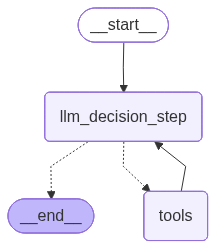

In [58]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))


In [59]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [60]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (99xcas9w0)
 Call ID: 99xcas9w0
  Args:
    query: Apple current stock price
================================= Tool Message =================================
Name: duckduckgo_search

3 weeks ago - (NASDAQ: AAPL) Apple currently has 14,840,390,000 outstanding shares. With Apple stock trading at $249.34 per share , the total value of Apple stock (market capitalization) is $3.70T. Apple stock was originally listed at a price of $0.12 in Dec 31, 1997. 11 hours ago - AAPL stock is currently pegged at around $271 , a gain of approximately 21% in the last 52 weeks, only slightly outpacing the S&P 500 Index ($SPX) performance of 19%. Apple stock touched a high of $277.32 on Oct. 1 day ago - Should You Buy or Sell Apple Stock? Get The Latest AAPL Stock Analy